In [181]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

import scikitplot as skplt
import seaborn as sns

In [182]:
import lightgbm as lgb
from sklearn.decomposition import PCA

In [183]:
X_train = pd.read_csv('train.csv', delimiter=',', header = None)
y_train = pd.read_csv('train-target.csv', delimiter=',', header = None)
X_test = pd.read_csv('test.csv', delimiter=',', header = None)

print(X_train.shape)
X_train.head(5)

(10000, 30)


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-220.530530,-70.197440,119.035181,20.711737,-6.152986,52.225051,-23.230903,-166.521871,-41.571463,2.620401,...,16.936420,46.543585,-80.962171,-146.652218,10.899085,4.370985,4.060272,40.680890,-37.942655,33.838225
1,-8.536541,-8.305435,-117.828269,-28.588333,14.223240,-42.087807,-45.538664,58.898976,27.749744,2.545916,...,57.027508,121.304258,31.507396,88.282912,66.766185,-4.363974,-5.791376,-32.101939,-52.255449,-4.826111
2,126.229973,133.463504,-105.511797,-149.110267,-3.673355,-104.302244,5.815395,100.838385,-46.240211,0.141700,...,4.819849,88.905713,51.475105,-73.257358,108.947287,8.567240,0.116269,-117.205053,-107.835928,-93.990332
3,369.571563,11.850181,-299.969407,29.371721,-3.457523,-115.901854,159.134323,-149.741411,-108.847522,0.078277,...,80.930568,-166.476192,-73.882682,108.222355,19.573192,-2.242024,0.515601,-25.218215,121.674228,-16.877368
4,-99.563708,-85.166292,-73.363391,-35.357907,5.437025,-54.892519,56.430532,-49.237377,-50.054608,2.586612,...,31.682235,209.163125,-22.847302,-62.067337,58.109167,2.862082,0.920341,-132.875142,3.492953,-15.799596


In [184]:
y_train = np.array(y_train[0])

In [186]:
scaler = StandardScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

/home/petr/anaconda2/lib/python3.7/site-packages/seaborn/axisgrid.py:311: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


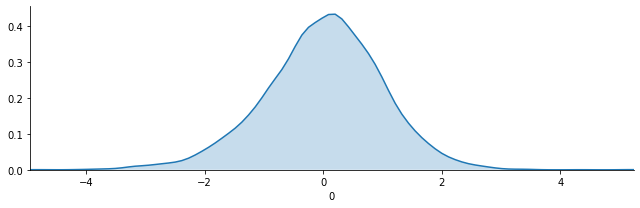

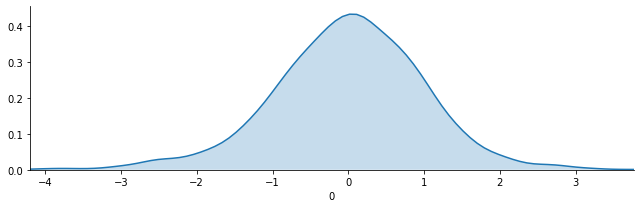

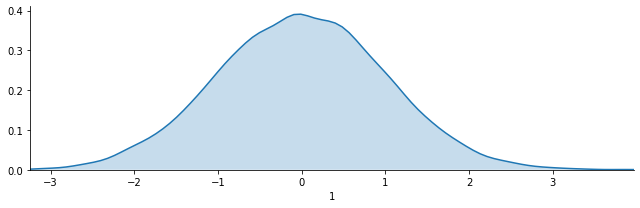

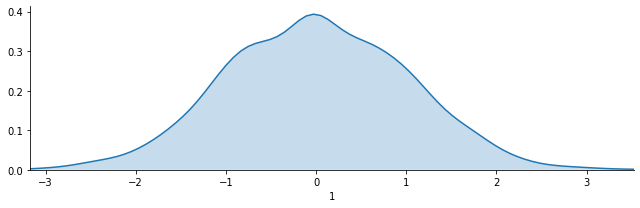

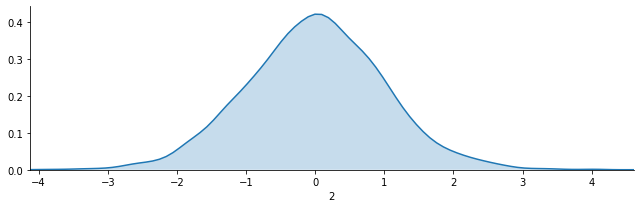

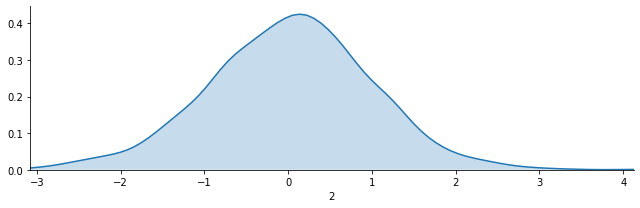

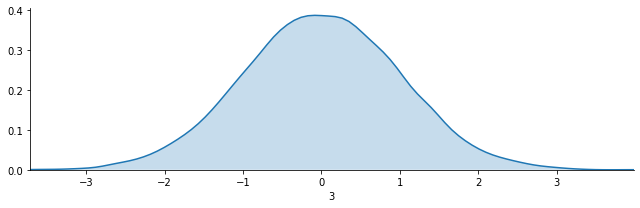

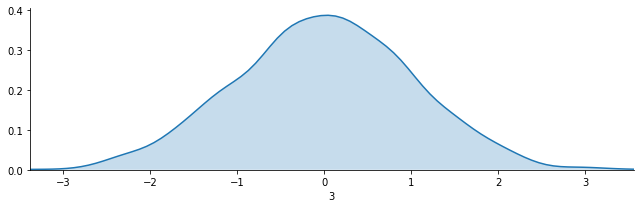

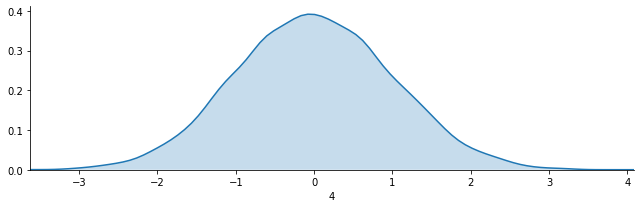

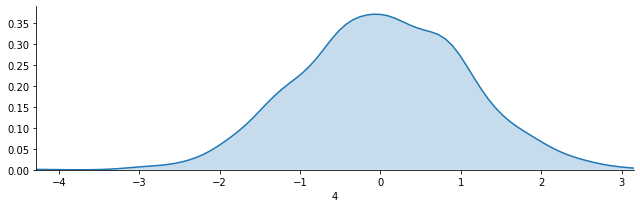

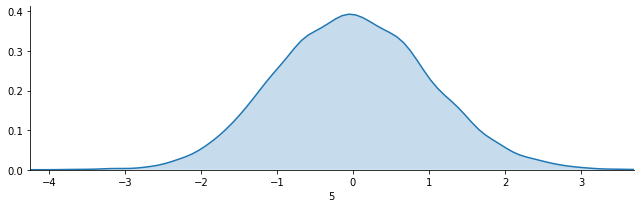

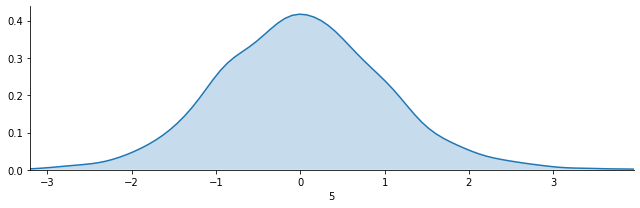

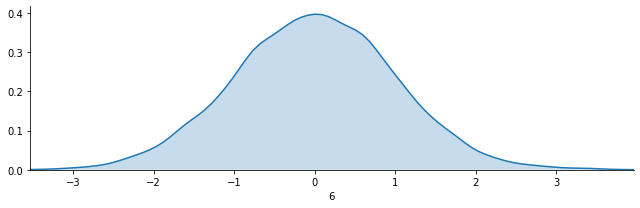

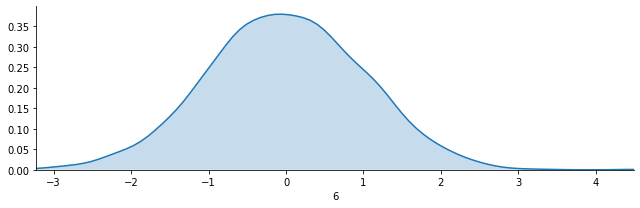

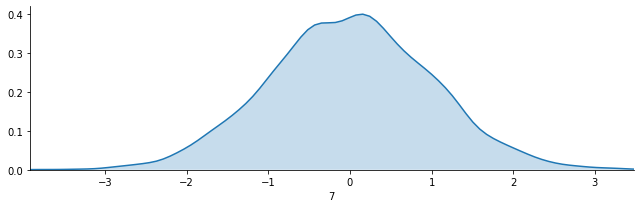

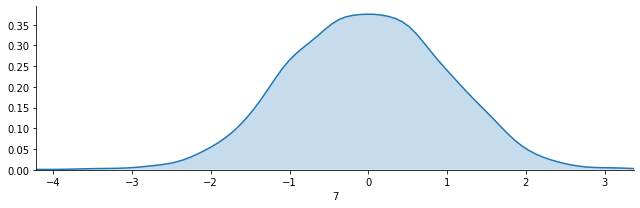

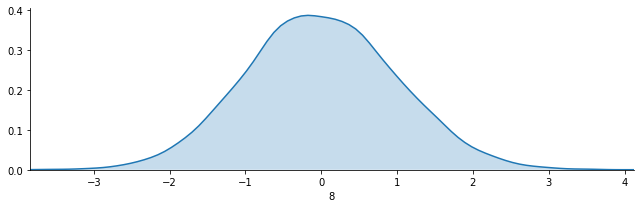

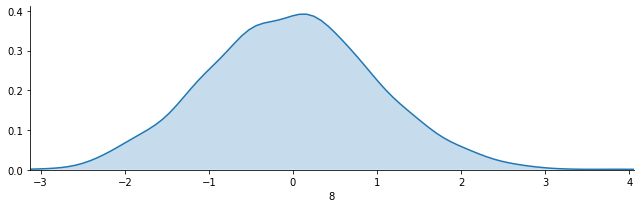

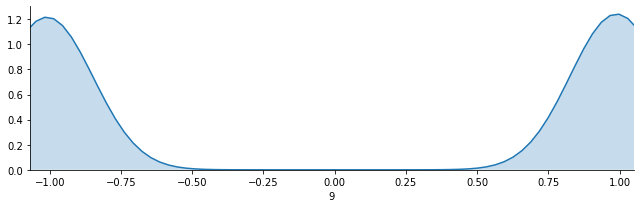

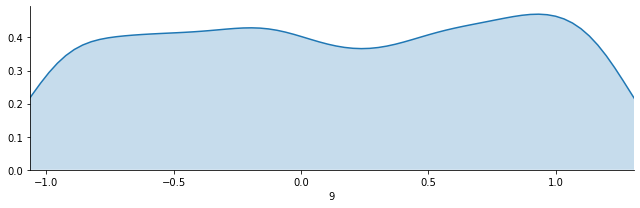

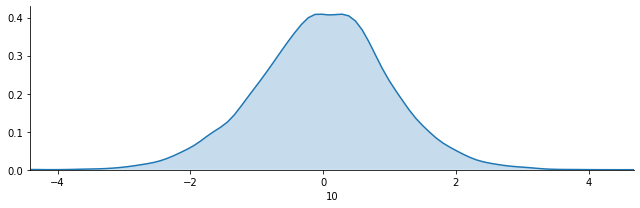

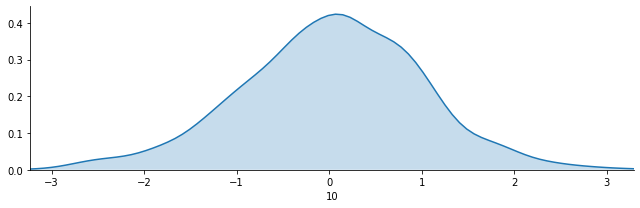

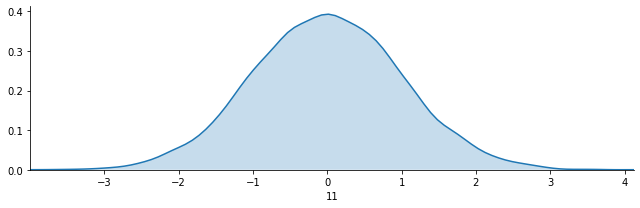

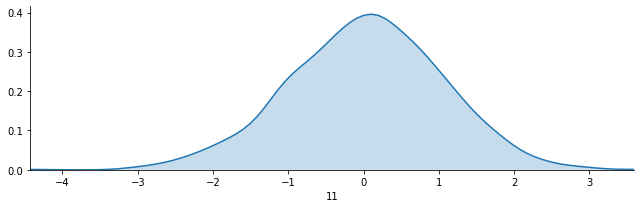

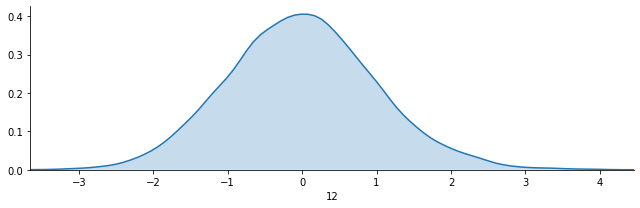

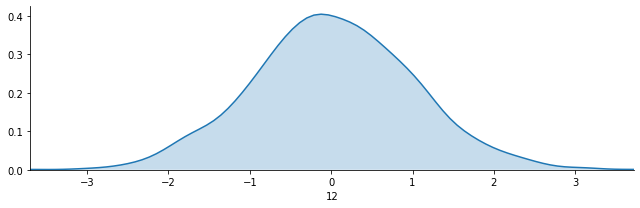

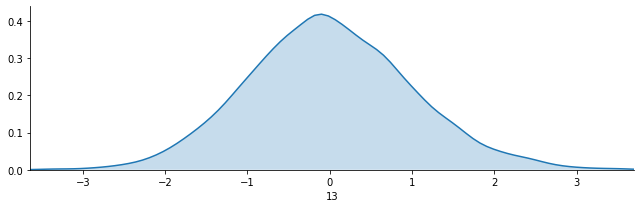

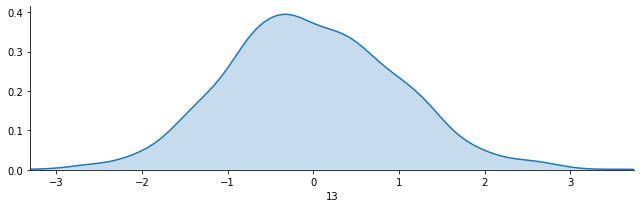

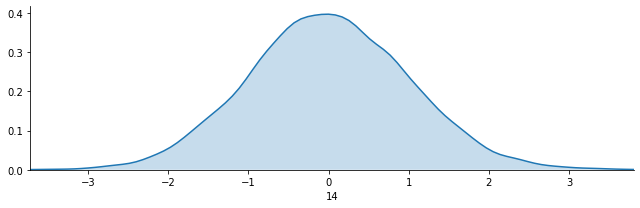

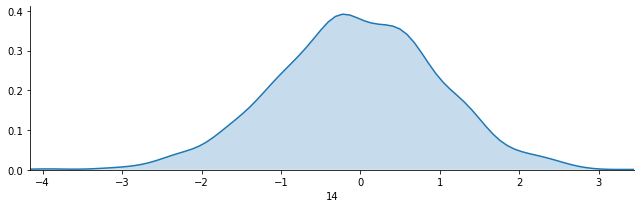

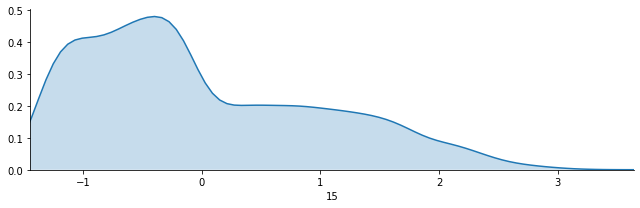

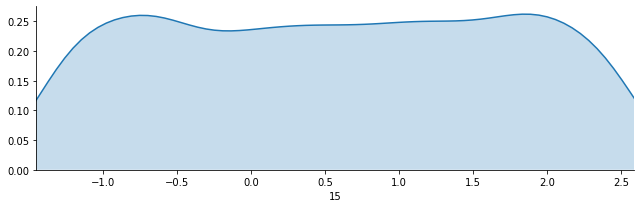

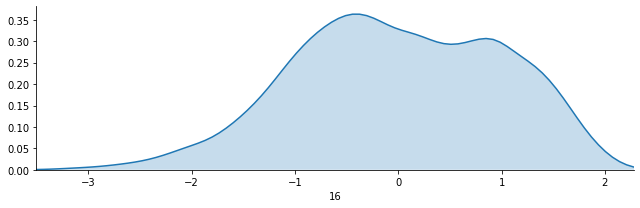

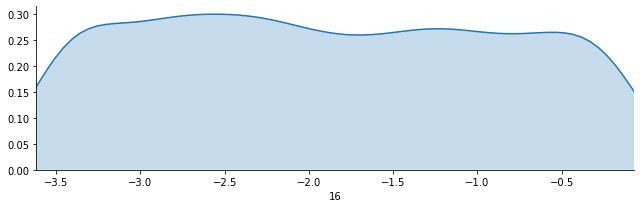

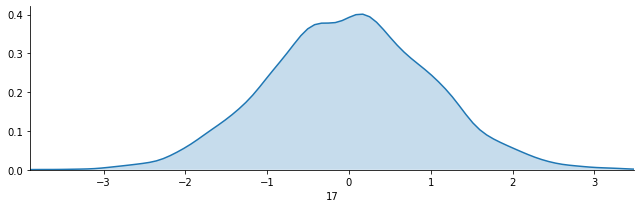

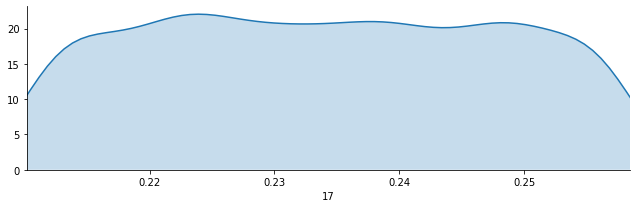

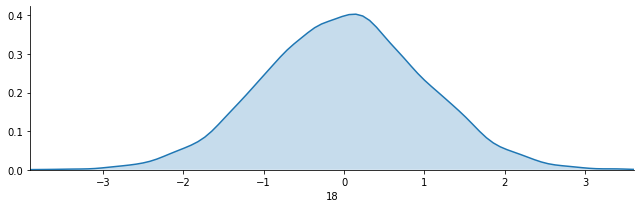

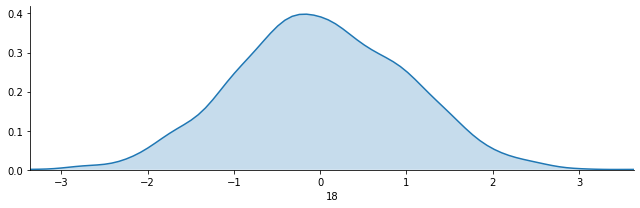

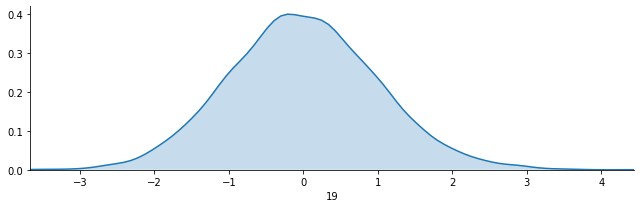

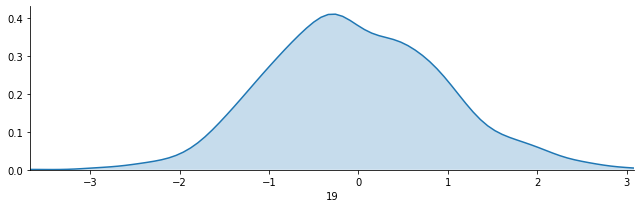

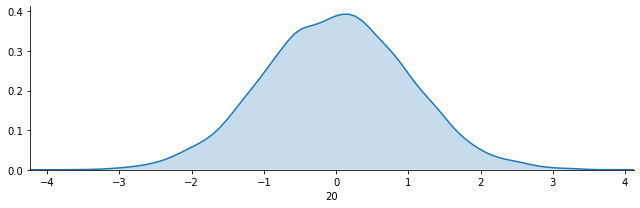

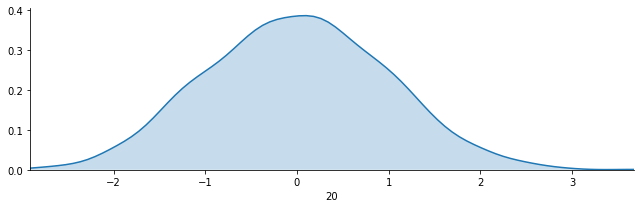

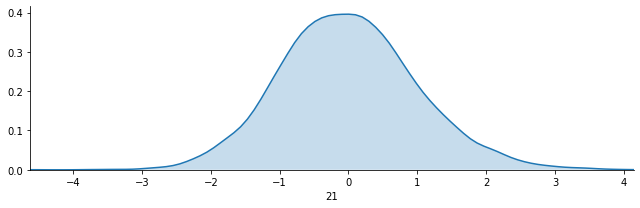

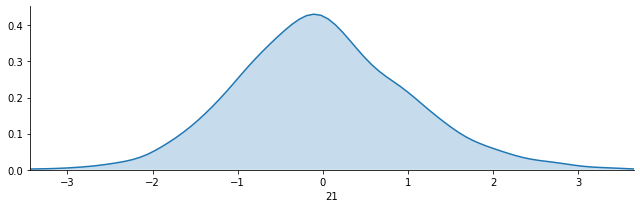

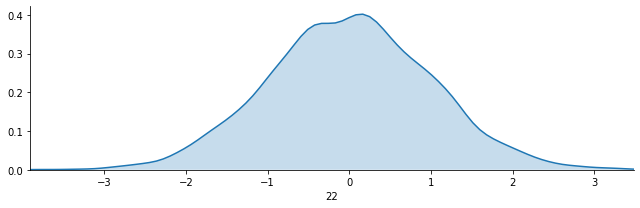

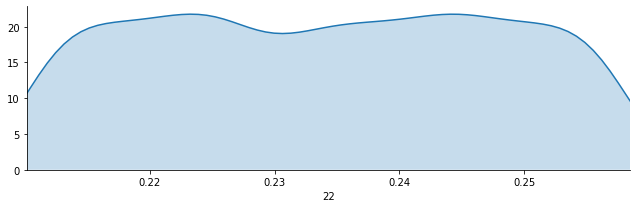

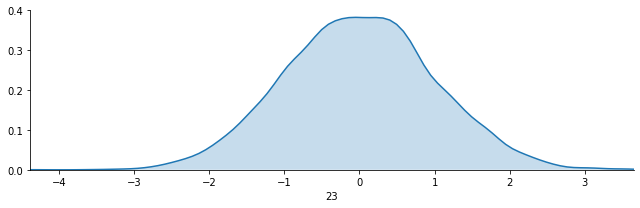

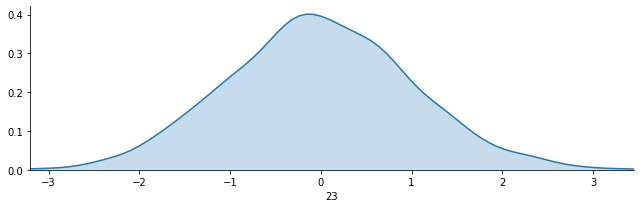

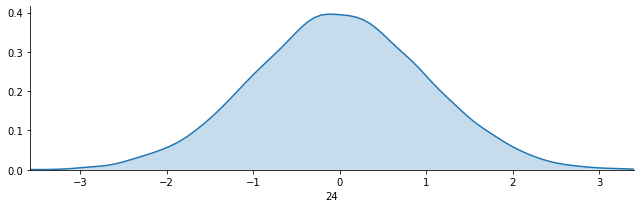

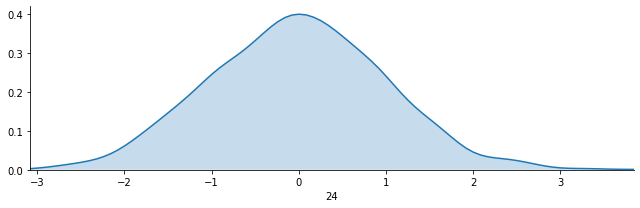

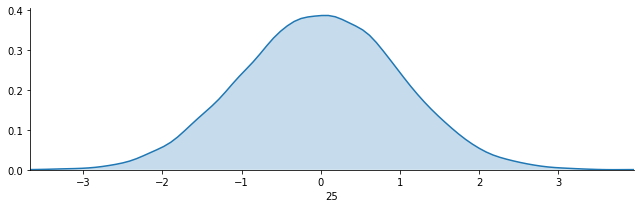

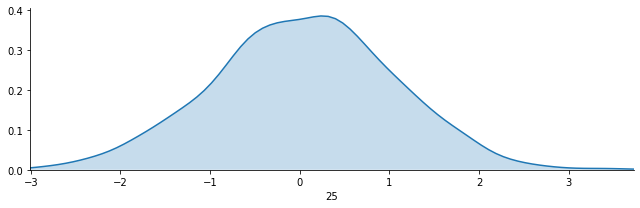

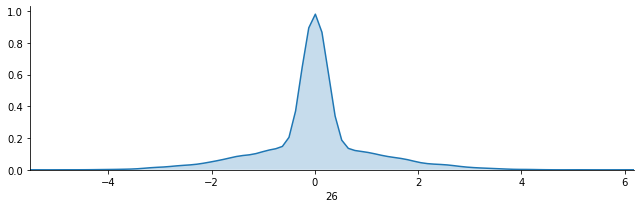

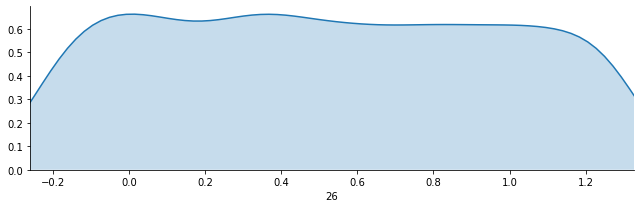

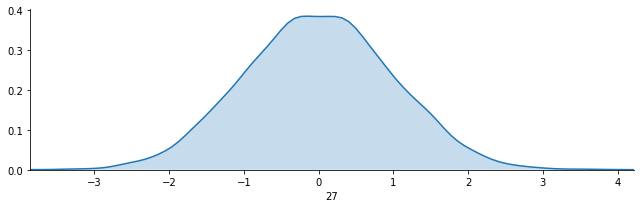

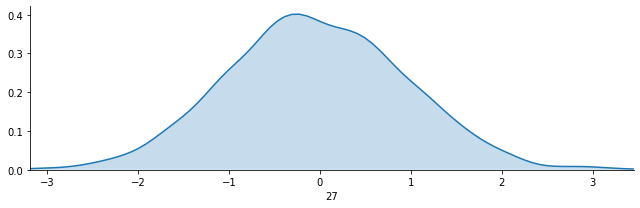

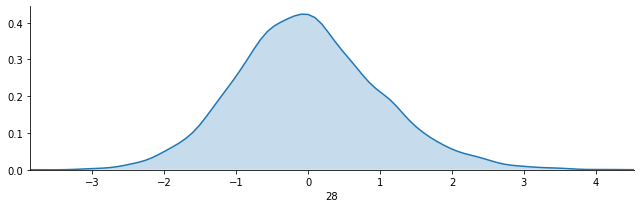

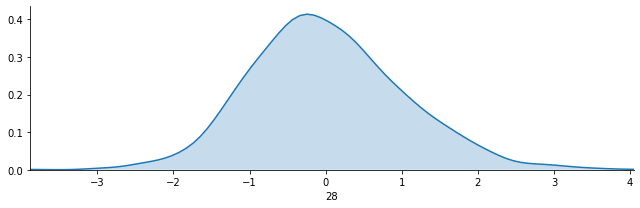

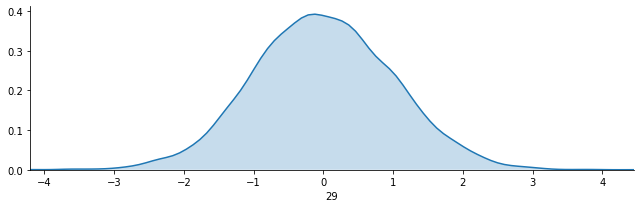

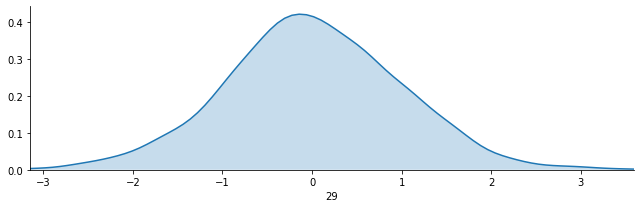

In [187]:
for feature in X_train.columns:
    fg = sns.FacetGrid(X_train, aspect=3)
    fg.map(sns.kdeplot, feature, shade=True)
    fg.set(xlim=(X_train[feature].min(), X_train[feature].max()))
    fg = sns.FacetGrid(X_test, aspect=3)
    fg.map(sns.kdeplot, feature, shade=True)
    fg.set(xlim=(X_test[feature].min(), X_test[feature].max()))

In [188]:
indexes = []
for i in range(30):
    if i not in [9, 15, 16, 17, 22, 26]:
        indexes.append(i)
#print(indexes)

X_train_new = X_train[indexes]
X_test_new = X_test[indexes]

In [189]:
from catboost import CatBoostClassifier, Pool, cv

from sklearn.model_selection import train_test_split

X_train_, X_validation, y_train_, y_validation = train_test_split(X_train_new, y_train, train_size=0.75, random_state=42)

In [197]:
params = {
    #'iterations': 500,
    #'learning_rate': 0.1,
    'eval_metric': 'AUC',
    #'logging_level': 'Silent',
    'use_best_model': True,
    'reg_lambda': 36.12
}

train_pool = Pool(X_train_, y_train_)
validate_pool = Pool(X_validation, y_validation)

model = CatBoostClassifier(**params)


#model = GridSearchCV(catboost, param_grid, scoring = 'roc_auc', cv=3)
#model.fit(X_train_, y_train_, eval_set=validate_pool)
model.fit(train_pool, eval_set=validate_pool)


print('Simple model validation accuracy: {:.4}'.format(
    roc_auc_score(y_validation, model.predict(X_validation))
))


0:	test: 0.6716343	best: 0.6716343 (0)	total: 10.6ms	remaining: 10.6s
1:	test: 0.7215063	best: 0.7215063 (1)	total: 21.7ms	remaining: 10.8s
2:	test: 0.7317675	best: 0.7317675 (2)	total: 32.1ms	remaining: 10.7s
3:	test: 0.7357974	best: 0.7357974 (3)	total: 42.1ms	remaining: 10.5s
4:	test: 0.7443818	best: 0.7443818 (4)	total: 52.7ms	remaining: 10.5s
5:	test: 0.7456782	best: 0.7456782 (5)	total: 62.9ms	remaining: 10.4s
6:	test: 0.7426754	best: 0.7456782 (5)	total: 72.9ms	remaining: 10.3s
7:	test: 0.7442041	best: 0.7456782 (5)	total: 82.8ms	remaining: 10.3s
8:	test: 0.7497119	best: 0.7497119 (8)	total: 93ms	remaining: 10.2s
9:	test: 0.7484927	best: 0.7497119 (8)	total: 102ms	remaining: 10.1s
10:	test: 0.7512092	best: 0.7512092 (10)	total: 111ms	remaining: 9.94s
11:	test: 0.7634026	best: 0.7634026 (11)	total: 118ms	remaining: 9.71s
12:	test: 0.7654919	best: 0.7654919 (12)	total: 125ms	remaining: 9.52s
13:	test: 0.7686548	best: 0.7686548 (13)	total: 133ms	remaining: 9.34s
14:	test: 0.7698099

121:	test: 0.8125607	best: 0.8125607 (121)	total: 1s	remaining: 7.23s
122:	test: 0.8125735	best: 0.8125735 (122)	total: 1.01s	remaining: 7.23s
123:	test: 0.8127233	best: 0.8127233 (123)	total: 1.02s	remaining: 7.23s
124:	test: 0.8128872	best: 0.8128872 (124)	total: 1.04s	remaining: 7.26s
125:	test: 0.8130627	best: 0.8130627 (125)	total: 1.05s	remaining: 7.27s
126:	test: 0.8134219	best: 0.8134219 (126)	total: 1.07s	remaining: 7.34s
127:	test: 0.8135666	best: 0.8135666 (127)	total: 1.08s	remaining: 7.38s
128:	test: 0.8136915	best: 0.8136915 (128)	total: 1.09s	remaining: 7.38s
129:	test: 0.8138163	best: 0.8138163 (129)	total: 1.1s	remaining: 7.38s
130:	test: 0.8140052	best: 0.8140052 (130)	total: 1.11s	remaining: 7.37s
131:	test: 0.8141788	best: 0.8141788 (131)	total: 1.12s	remaining: 7.36s
132:	test: 0.8141506	best: 0.8141788 (131)	total: 1.13s	remaining: 7.36s
133:	test: 0.8141487	best: 0.8141788 (131)	total: 1.14s	remaining: 7.34s
134:	test: 0.8143401	best: 0.8143401 (134)	total: 1.14s

246:	test: 0.8202932	best: 0.8202932 (246)	total: 2.01s	remaining: 6.14s
247:	test: 0.8204174	best: 0.8204174 (247)	total: 2.02s	remaining: 6.13s
248:	test: 0.8205359	best: 0.8205359 (248)	total: 2.03s	remaining: 6.13s
249:	test: 0.8205218	best: 0.8205359 (248)	total: 2.04s	remaining: 6.13s
250:	test: 0.8206537	best: 0.8206537 (250)	total: 2.05s	remaining: 6.12s
251:	test: 0.8207075	best: 0.8207075 (251)	total: 2.06s	remaining: 6.11s
252:	test: 0.8208029	best: 0.8208029 (252)	total: 2.06s	remaining: 6.1s
253:	test: 0.8208061	best: 0.8208061 (253)	total: 2.07s	remaining: 6.08s
254:	test: 0.8209233	best: 0.8209233 (254)	total: 2.08s	remaining: 6.07s
255:	test: 0.8209899	best: 0.8209899 (255)	total: 2.08s	remaining: 6.06s
256:	test: 0.8209226	best: 0.8209899 (255)	total: 2.09s	remaining: 6.05s
257:	test: 0.8209162	best: 0.8209899 (255)	total: 2.1s	remaining: 6.04s
258:	test: 0.8209175	best: 0.8209899 (255)	total: 2.11s	remaining: 6.03s
259:	test: 0.8208548	best: 0.8209899 (255)	total: 2.1

374:	test: 0.8248139	best: 0.8248401 (372)	total: 3.25s	remaining: 5.42s
375:	test: 0.8248382	best: 0.8248401 (372)	total: 3.26s	remaining: 5.41s
376:	test: 0.8248376	best: 0.8248401 (372)	total: 3.27s	remaining: 5.41s
377:	test: 0.8249323	best: 0.8249323 (377)	total: 3.29s	remaining: 5.41s
378:	test: 0.8249970	best: 0.8249970 (378)	total: 3.3s	remaining: 5.4s
379:	test: 0.8250111	best: 0.8250111 (379)	total: 3.31s	remaining: 5.39s
380:	test: 0.8249855	best: 0.8250111 (379)	total: 3.31s	remaining: 5.38s
381:	test: 0.8250021	best: 0.8250111 (379)	total: 3.32s	remaining: 5.38s
382:	test: 0.8250399	best: 0.8250399 (382)	total: 3.33s	remaining: 5.37s
383:	test: 0.8250956	best: 0.8250956 (383)	total: 3.34s	remaining: 5.36s
384:	test: 0.8251558	best: 0.8251558 (384)	total: 3.35s	remaining: 5.35s
385:	test: 0.8251827	best: 0.8251827 (385)	total: 3.35s	remaining: 5.34s
386:	test: 0.8251769	best: 0.8251827 (385)	total: 3.36s	remaining: 5.33s
387:	test: 0.8252301	best: 0.8252301 (387)	total: 3.3

490:	test: 0.8273354	best: 0.8274513 (483)	total: 4.47s	remaining: 4.64s
491:	test: 0.8273732	best: 0.8274513 (483)	total: 4.48s	remaining: 4.63s
492:	test: 0.8274123	best: 0.8274513 (483)	total: 4.5s	remaining: 4.62s
493:	test: 0.8274014	best: 0.8274513 (483)	total: 4.51s	remaining: 4.62s
494:	test: 0.8274866	best: 0.8274866 (494)	total: 4.52s	remaining: 4.61s
495:	test: 0.8274136	best: 0.8274866 (494)	total: 4.53s	remaining: 4.6s
496:	test: 0.8273508	best: 0.8274866 (494)	total: 4.53s	remaining: 4.59s
497:	test: 0.8273130	best: 0.8274866 (494)	total: 4.54s	remaining: 4.58s
498:	test: 0.8273271	best: 0.8274866 (494)	total: 4.55s	remaining: 4.57s
499:	test: 0.8273924	best: 0.8274866 (494)	total: 4.55s	remaining: 4.55s
500:	test: 0.8274430	best: 0.8274866 (494)	total: 4.56s	remaining: 4.54s
501:	test: 0.8273828	best: 0.8274866 (494)	total: 4.57s	remaining: 4.53s
502:	test: 0.8274123	best: 0.8274866 (494)	total: 4.58s	remaining: 4.52s
503:	test: 0.8273905	best: 0.8274866 (494)	total: 4.5

624:	test: 0.8282825	best: 0.8285392 (572)	total: 5.48s	remaining: 3.29s
625:	test: 0.8281467	best: 0.8285392 (572)	total: 5.49s	remaining: 3.28s
626:	test: 0.8281090	best: 0.8285392 (572)	total: 5.5s	remaining: 3.27s
627:	test: 0.8281589	best: 0.8285392 (572)	total: 5.5s	remaining: 3.26s
628:	test: 0.8282108	best: 0.8285392 (572)	total: 5.51s	remaining: 3.25s
629:	test: 0.8281980	best: 0.8285392 (572)	total: 5.52s	remaining: 3.24s
630:	test: 0.8281916	best: 0.8285392 (572)	total: 5.53s	remaining: 3.23s
631:	test: 0.8282082	best: 0.8285392 (572)	total: 5.53s	remaining: 3.22s
632:	test: 0.8282793	best: 0.8285392 (572)	total: 5.54s	remaining: 3.21s
633:	test: 0.8282594	best: 0.8285392 (572)	total: 5.55s	remaining: 3.2s
634:	test: 0.8283311	best: 0.8285392 (572)	total: 5.55s	remaining: 3.19s
635:	test: 0.8283087	best: 0.8285392 (572)	total: 5.56s	remaining: 3.18s
636:	test: 0.8282517	best: 0.8285392 (572)	total: 5.57s	remaining: 3.17s
637:	test: 0.8282088	best: 0.8285392 (572)	total: 5.58

748:	test: 0.8293493	best: 0.8293493 (748)	total: 6.51s	remaining: 2.18s
749:	test: 0.8294395	best: 0.8294395 (749)	total: 6.53s	remaining: 2.17s
750:	test: 0.8294690	best: 0.8294690 (750)	total: 6.55s	remaining: 2.17s
751:	test: 0.8294210	best: 0.8294690 (750)	total: 6.56s	remaining: 2.16s
752:	test: 0.8294210	best: 0.8294690 (750)	total: 6.58s	remaining: 2.16s
753:	test: 0.8294760	best: 0.8294760 (753)	total: 6.59s	remaining: 2.15s
754:	test: 0.8295414	best: 0.8295414 (754)	total: 6.61s	remaining: 2.14s
755:	test: 0.8295343	best: 0.8295414 (754)	total: 6.62s	remaining: 2.14s
756:	test: 0.8295746	best: 0.8295746 (756)	total: 6.63s	remaining: 2.13s
757:	test: 0.8296060	best: 0.8296060 (757)	total: 6.64s	remaining: 2.12s
758:	test: 0.8295849	best: 0.8296060 (757)	total: 6.66s	remaining: 2.11s
759:	test: 0.8295305	best: 0.8296060 (757)	total: 6.66s	remaining: 2.1s
760:	test: 0.8295420	best: 0.8296060 (757)	total: 6.67s	remaining: 2.1s
761:	test: 0.8295349	best: 0.8296060 (757)	total: 6.6

865:	test: 0.8295106	best: 0.8298058 (832)	total: 7.51s	remaining: 1.16s
866:	test: 0.8295811	best: 0.8298058 (832)	total: 7.52s	remaining: 1.15s
867:	test: 0.8295766	best: 0.8298058 (832)	total: 7.53s	remaining: 1.15s
868:	test: 0.8295574	best: 0.8298058 (832)	total: 7.54s	remaining: 1.14s
869:	test: 0.8294972	best: 0.8298058 (832)	total: 7.55s	remaining: 1.13s
870:	test: 0.8295228	best: 0.8298058 (832)	total: 7.56s	remaining: 1.12s
871:	test: 0.8295023	best: 0.8298058 (832)	total: 7.57s	remaining: 1.11s
872:	test: 0.8294978	best: 0.8298058 (832)	total: 7.58s	remaining: 1.1s
873:	test: 0.8294997	best: 0.8298058 (832)	total: 7.59s	remaining: 1.09s
874:	test: 0.8295074	best: 0.8298058 (832)	total: 7.6s	remaining: 1.08s
875:	test: 0.8294498	best: 0.8298058 (832)	total: 7.61s	remaining: 1.08s
876:	test: 0.8294632	best: 0.8298058 (832)	total: 7.61s	remaining: 1.07s
877:	test: 0.8294722	best: 0.8298058 (832)	total: 7.62s	remaining: 1.06s
878:	test: 0.8295215	best: 0.8298058 (832)	total: 7.6

986:	test: 0.8293249	best: 0.8298058 (832)	total: 8.77s	remaining: 115ms
987:	test: 0.8292903	best: 0.8298058 (832)	total: 8.78s	remaining: 107ms
988:	test: 0.8292673	best: 0.8298058 (832)	total: 8.79s	remaining: 97.8ms
989:	test: 0.8292013	best: 0.8298058 (832)	total: 8.8s	remaining: 88.9ms
990:	test: 0.8291847	best: 0.8298058 (832)	total: 8.81s	remaining: 80ms
991:	test: 0.8291680	best: 0.8298058 (832)	total: 8.81s	remaining: 71.1ms
992:	test: 0.8291802	best: 0.8298058 (832)	total: 8.82s	remaining: 62.2ms
993:	test: 0.8291924	best: 0.8298058 (832)	total: 8.83s	remaining: 53.3ms
994:	test: 0.8292039	best: 0.8298058 (832)	total: 8.84s	remaining: 44.4ms
995:	test: 0.8292526	best: 0.8298058 (832)	total: 8.84s	remaining: 35.5ms
996:	test: 0.8292795	best: 0.8298058 (832)	total: 8.85s	remaining: 26.6ms
997:	test: 0.8292481	best: 0.8298058 (832)	total: 8.86s	remaining: 17.7ms
998:	test: 0.8292545	best: 0.8298058 (832)	total: 8.86s	remaining: 8.87ms
999:	test: 0.8291905	best: 0.8298058 (832)	

In [131]:
'''param_grid = {
    'reg_lambda': np.linspace(20, 36, 10)
}

estimator = lgb.LGBMClassifier(n_estimators = 500, learning_rate = 0.1)
model = GridSearchCV(estimator, param_grid, scoring = 'roc_auc', cv=3)
model.fit(X_train_new, y_train)'''

GridSearchCV(cv=3, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=500,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'reg_lambda': array([20.        , 21.77777778, 23.55555556, 25.333333

In [191]:
'''print(model.best_params_)
print(model.best_score_)'''

{'reg_lambda': 34.666666666666664}
0.8191667043861858


In [198]:
y_pred = model.predict_proba(X_test_new)
y_pred

array([[0.89435736, 0.10564264],
       [0.50985697, 0.49014303],
       [0.8981845 , 0.1018155 ],
       ...,
       [0.75786706, 0.24213294],
       [0.75568272, 0.24431728],
       [0.19323709, 0.80676291]])

In [199]:
y_pred = y_pred[:, 1:]

In [200]:
pred_proba = pd.DataFrame(y_pred)
pred_proba.head(5)

,0
0,0.105643
1,0.490143
2,0.101815
3,0.461190
4,0.192233


In [201]:
pred_proba.to_csv('ans.csv', header=False, index = False)